In [1]:
import pickle
import numpy as nper
import numpy as np
from ase.io import read
from ase.eos import calculate_eos
from ase.io.trajectory import Trajectory
import matplotlib.pyplot as plt
from ase.eos import EquationOfState as eos
from ase.units import Bohr,Rydberg
from ase.io.trajectory import TrajectoryReader as trread

In [18]:
def r(x,d=False):
    v,e=pickle.load(open("./data_POSCAR_li_r.pickle","rb"))
    z = np.polyfit(v,e, 3)
    p1 = np.poly1d(z)
    if d:
            return p1.deriv()(x)
    else:
            return p1(x)
def p(x,d=False):
    v,e=pickle.load(open("./data_POSCAR_li_p.pickle","rb"))
    e=np.array(e)*0.25
    v=np.array(v)*0.25
    z = np.polyfit(v,e, 3)
    p1 = np.poly1d(z)
    if d:
            return p1.deriv()(x)
    else:
            return p1(x)
def equations(X):
    x1,x2=X
    e1=r(x1,d=1)-p(x2,d=1)
    e2=(r(x1)-p(x2))/(x1-x2) - r(x1,d=1)
    return (e1,e2)
def line(x,results=None,dir=0):
    x1,x2=result.x
    z=np.polyfit([x1,x2], [r(x1),p(x2)], 1)
    p1 = np.poly1d(z)
    return p1(x)
        
def get_ab(results):
    x1,x2=result.x
    return np.polyfit([x1,x2], [r(x1),p(x2)], 1)


In [24]:
from scipy.optimize import least_squares
lb = (32, 42)   # lower bounds on x1, x2
ub = (45,50)   # upper bounds
result = least_squares(equations, [35, 42], ftol=1e-12, xtol=1e-12, gtol=1e-12, bounds=(lb, ub))

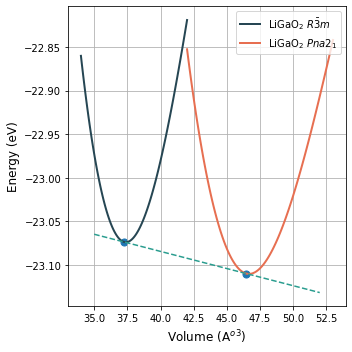

In [30]:
fig,ax=plt.subplots(figsize=(5,5))
V=np.linspace(34,42,100)
ax.plot(V,r(V),c="#264653",lw=2,label="LiGaO$_2$ $R\\bar{3}m$")

V=np.linspace(42,53,100)
ax.plot(V,p(V),c="#e76f51",lw=2,label="LiGaO$_2$ $Pna2_1$")

x=np.linspace(35,52)
ax.plot(x,line(x,result),c="#2a9d8f",ls="--")
ax.scatter(result.x,[r(result.x[0]),p(result.x[1])],s=50)


ax.set_xlabel("Volume (A$^o$$^3$)",fontsize=12)
ax.set_ylabel("Energy (eV)",fontsize=12)
ax.legend(loc="upper right")
ax.grid()
plt.tight_layout()
plt.savefig("E-P-Ligao2.png",dpi=300)
plt.show()

In [29]:
get_ab(result)

array([-3.93390165e-03, -2.29270020e+01])